Creating a Movie recommender using data science and my past ratings

Overview
    
    I have been keeping track of all the movies I have watched and rated on the Letterboxd site. Currently I have logged over 700 movies and rated 688 of them. Being able to visualize with data the movies I watched was my first goal after learning I could export the data from the site. 
    I then realized I could build a model using this data (and data I was able to attech from a movie database) to predict what I would rate a movie on Letterboxd. One of my main motivatorsin countinuing to watch new movies and log them is the idea that I want to see all any movie that would prevent someone saying "I can't believe you haven't seen that one" in a conversation. Yes, this and other movie references I did not understand occured on a regular basis. In an attempt to help me continue to check off movies from this list, I plan on using my model to tell me which highly rated movies I should see next based off of what it predicts I would rate it.

Data Dictionary
- Letterboxd: Movie rating site
- The Movie Database (TMDB): Movie database
- Date: Date I rated the movie
- Name: Name of the movie
- Year: Year the movie released
- Rating: My rating of the movie on a 0-5 scale (In 0.5 increments)
- TMDB_ID: ID number of movie in TMDB database
- Title: Name of the movie
- Release_Date: Release data of movie
- Runtime: Runtime in minutes
- Genres: Genre of movie (often multiple)
- Director: Director of movie
- Stars: Top stars of movie (Top 3)
- TMDB_Rating: Average rating of movie by users of TMDB site
- Revenue: Revenue of movie
- Popularity: Popularity of movie


Data

- Ratings: This is the outputted file of the movies I have logged on Letterboxd
- info_df: This includes data pulled from the API site. The data is attributes of movies, specifically movies I have already rated
- full_top500: The output of the top 500 rated movies on TMDB and attributes of the movies
- unseen: The same dataset as full_top500 with the movies I have already rated removed



Methods 

- Neural Network
-   K-Fold
-   Bootstrapping




In [ ]:
import pandas as pd
watched = pd.read_csv(r"C:\Users\slleh\Documents\Python\Letterboxd\watched.csv")
ratings = pd.read_csv(r"C:\Users\slleh\Documents\Python\Letterboxd\ratings.csv")

In [229]:
ratings

,Date,Name,Year,Letterboxd URI,Rating
0,2021-10-25,Parasite,2019,https://boxd.it/hTha,4.0
1,2021-10-25,Joker,2019,https://boxd.it/h4cS,3.5
2,2021-10-25,Knives Out,2019,https://boxd.it/jWEA,4.5
3,2021-10-25,The Dark Knight,2008,https://boxd.it/2b0k,5.0
4,2021-10-25,Inception,2010,https://boxd.it/1skk,5.0
...,...,...,...,...,...
683,2025-10-14,The Super Mario Bros. Movie,2023,https://boxd.it/i8C8,3.0
684,2025-10-22,Idiocracy,2006,https://boxd.it/20RW,2.0
685,2025-10-31,Burn After Reading,2008,https://boxd.it/23BW,2.5
686,2025-11-07,Last Seen Alive,2022,https://boxd.it/Aj8u,2.5


In [ ]:
import requests
from time import sleep

API_KEY = 

def get_movie_details(title, year=None):
    """Search TMDB for a movie and return details."""
    try:
        search_url = "https://api.themoviedb.org/3/search/movie"
        search_params = {"api_key": API_KEY, "query": title, "year": year}
        search_response = requests.get(search_url, params=search_params)
        search_data = search_response.json()
        
        if not search_data.get("results"):
            return None
        
        movie_id = search_data["results"][0]["id"]
        
        detail_url = f"https://api.themoviedb.org/3/movie/{movie_id}"
        detail_params = {"api_key": API_KEY, "append_to_response": "credits"}
        detail_response = requests.get(detail_url, params=detail_params)
        detail_data = detail_response.json()
        
        # Director
        director = next(
            (p["name"] for p in detail_data["credits"]["crew"] if p["job"] == "Director"), None
        )
        # Genres
        genres = ", ".join([g["name"] for g in detail_data.get("genres", [])])
        # Stars (top 3)
        cast_list = [c["name"] for c in detail_data["credits"].get("cast", [])[:3]]
        stars = ", ".join(cast_list)
        
        return {
            "TMDB_ID": movie_id,
            "Title": detail_data.get("title"),
            "Release_Date": detail_data.get("release_date"),
            "Runtime": detail_data.get("runtime"),
            "Genres": genres,
            "Director": director,
            "Stars": stars,   
            "TMDB_Rating": detail_data.get("vote_average"),
            "Revenue": detail_data.get("revenue"),
            "Popularity": detail_data.get("popularity")
        }
    except Exception as e:
        print(f"Error fetching {title}: {e}")
        return None


In [165]:
from tqdm import tqdm

tqdm.pandas()

# applying TMDB data to letterboxd data
ratings["TMDB_Data"] = ratings.progress_apply(
    lambda x: get_movie_details(x["Name"], x["Year"]), axis=1
)
info_df = pd.json_normalize(ratings["TMDB_Data"])


#combined Letterboxd and TMDB
combined = pd.concat([ratings, info_df], axis=1)
combined.to_csv("letterboxd_enriched_sample.csv", index=False)

100%|██████████| 688/688 [02:44<00:00,  4.18it/s]


In [166]:
combined

,Date,Name,Year,Letterboxd URI,Rating,TMDB_Data,TMDB_ID,Title,Release_Date,Runtime,Genres,Director,Stars,TMDB_Rating,Revenue,Popularity
0,2021-10-25,Parasite,2019,https://boxd.it/hTha,4.0,"{'TMDB_ID': 496243, 'Title': 'Parasite', 'Rele...",496243.0,Parasite,2019-05-30,133.0,"Comedy, Thriller, Drama",Bong Joon Ho,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong",8.496,2.575918e+08,17.3816
1,2021-10-25,Joker,2019,https://boxd.it/h4cS,3.5,"{'TMDB_ID': 475557, 'Title': 'Joker', 'Release...",475557.0,Joker,2019-10-01,122.0,"Crime, Thriller, Drama",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz",8.100,1.078959e+09,14.3120
2,2021-10-25,Knives Out,2019,https://boxd.it/jWEA,4.5,"{'TMDB_ID': 546554, 'Title': 'Knives Out', 'Re...",546554.0,Knives Out,2019-11-27,131.0,"Comedy, Crime, Mystery",Rian Johnson,"Daniel Craig, Chris Evans, Ana de Armas",7.800,3.128979e+08,9.9031
3,2021-10-25,The Dark Knight,2008,https://boxd.it/2b0k,5.0,"{'TMDB_ID': 155, 'Title': 'The Dark Knight', '...",155.0,The Dark Knight,2008-07-16,152.0,"Drama, Action, Crime, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",8.524,1.004558e+09,22.4189
4,2021-10-25,Inception,2010,https://boxd.it/1skk,5.0,"{'TMDB_ID': 27205, 'Title': 'Inception', 'Rele...",27205.0,Inception,2010-07-15,148.0,"Action, Science Fiction, Adventure",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...",8.370,8.390306e+08,21.5600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,2025-10-14,The Super Mario Bros. Movie,2023,https://boxd.it/i8C8,3.0,"{'TMDB_ID': 502356, 'Title': 'The Super Mario ...",502356.0,The Super Mario Bros. Movie,2023-04-05,93.0,"Family, Comedy, Adventure, Animation, Fantasy",Aaron Horvath,"Chris Pratt, Anya Taylor-Joy, Charlie Day",7.604,1.362000e+09,21.3243
684,2025-10-22,Idiocracy,2006,https://boxd.it/20RW,2.0,"{'TMDB_ID': 7512, 'Title': 'Idiocracy', 'Relea...",7512.0,Idiocracy,2006-09-01,84.0,"Comedy, Science Fiction, Adventure",Mike Judge,"Luke Wilson, Maya Rudolph, Dax Shepard",6.359,4.953030e+05,7.4658
685,2025-10-31,Burn After Reading,2008,https://boxd.it/23BW,2.5,"{'TMDB_ID': 4944, 'Title': 'Burn After Reading...",4944.0,Burn After Reading,2008-09-05,96.0,"Comedy, Drama",Ethan Coen,"George Clooney, Frances McDormand, Brad Pitt",6.667,1.637000e+08,3.0911
686,2025-11-07,Last Seen Alive,2022,https://boxd.it/Aj8u,2.5,"{'TMDB_ID': 961484, 'Title': 'Last Seen Alive'...",961484.0,Last Seen Alive,2022-05-12,95.0,"Action, Thriller",Brian Goodman,"Gerard Butler, Jaimie Alexander, Russell Hornsby",6.423,5.950199e+06,3.0121


In [167]:
combined = combined.drop(columns=["Letterboxd URI", "TMDB_Data"], errors="ignore")
combined
combined.to_csv("combined_movie_data.csv", index=False)

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_movies = pd.read_csv

# Optional (makes plots look nicer)
sns.set(style="whitegrid", palette="pastel")
combined_movies


,Date,Name,Year,Rating,TMDB_ID,Title,Release_Date,Runtime,Genres,Director,Stars,TMDB_Rating,Revenue,Popularity
0,2021-10-25,Parasite,2019,4.0,496243.0,Parasite,2019-05-30,133.0,"Comedy, Thriller, Drama",Bong Joon Ho,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong",8.496,2.575918e+08,17.3816
1,2021-10-25,Joker,2019,3.5,475557.0,Joker,2019-10-01,122.0,"Crime, Thriller, Drama",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz",8.100,1.078959e+09,14.3120
2,2021-10-25,Knives Out,2019,4.5,546554.0,Knives Out,2019-11-27,131.0,"Comedy, Crime, Mystery",Rian Johnson,"Daniel Craig, Chris Evans, Ana de Armas",7.800,3.128979e+08,9.9031
3,2021-10-25,The Dark Knight,2008,5.0,155.0,The Dark Knight,2008-07-16,152.0,"Drama, Action, Crime, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",8.524,1.004558e+09,22.4189
4,2021-10-25,Inception,2010,5.0,27205.0,Inception,2010-07-15,148.0,"Action, Science Fiction, Adventure",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...",8.370,8.390306e+08,21.5600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,2025-10-14,The Super Mario Bros. Movie,2023,3.0,502356.0,The Super Mario Bros. Movie,2023-04-05,93.0,"Family, Comedy, Adventure, Animation, Fantasy",Aaron Horvath,"Chris Pratt, Anya Taylor-Joy, Charlie Day",7.604,1.362000e+09,21.3243
684,2025-10-22,Idiocracy,2006,2.0,7512.0,Idiocracy,2006-09-01,84.0,"Comedy, Science Fiction, Adventure",Mike Judge,"Luke Wilson, Maya Rudolph, Dax Shepard",6.359,4.953030e+05,7.4658
685,2025-10-31,Burn After Reading,2008,2.5,4944.0,Burn After Reading,2008-09-05,96.0,"Comedy, Drama",Ethan Coen,"George Clooney, Frances McDormand, Brad Pitt",6.667,1.637000e+08,3.0911
686,2025-11-07,Last Seen Alive,2022,2.5,961484.0,Last Seen Alive,2022-05-12,95.0,"Action, Thriller",Brian Goodman,"Gerard Butler, Jaimie Alexander, Russell Hornsby",6.423,5.950199e+06,3.0121


C:\Users\slleh\AppData\Local\Temp\ipykernel_18436\360314538.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(


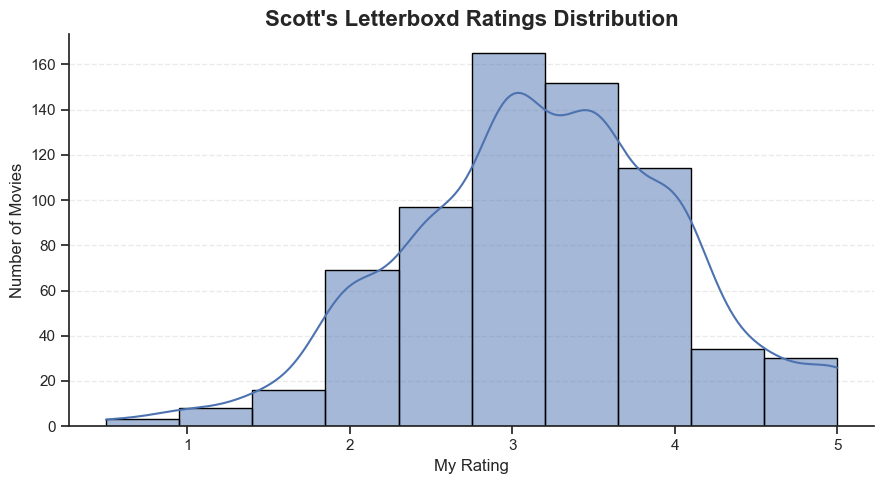

In [231]:
# Bar chart distibution of my Letterboxd rankings

plt.figure(figsize=(9,5))
sns.set_theme(style="ticks")

ax = sns.histplot(
    data=combined_movies,
    x="Rating",
    bins=10,
    kde=True,
    palette="viridis",
    edgecolor="black",
    linewidth=1,
)

plt.title("Scott's Letterboxd Ratings Distribution", fontsize=16, fontweight="bold")
plt.xlabel("My Rating", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
sns.despine()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

C:\Users\slleh\AppData\Local\Temp\ipykernel_18436\2201463074.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


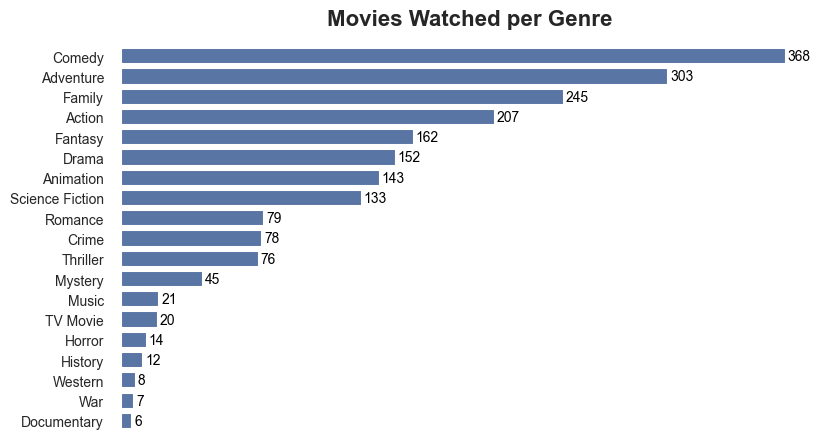

In [ ]:
# bar plot of movies watched per genre (Top 15)

df_genres = combined_movies.assign(Genres=combined_movies["Genres"].str.split(", ")).explode("Genres")

genre_counts = df_genres["Genres"].value_counts().head(20)  

plt.figure(figsize=(9,5))
sns.set_theme(style="ticks", context="talk")

ax = sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
)

plt.title("Movies Watched per Genre", fontsize=16, fontweight="bold", pad=15)

for i, count in enumerate(genre_counts.values):
    ax.text(count + 1, i, str(count), va="center", fontsize=10, color="black")

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.tick_params(left=False, bottom=False, labelleft=True, labelbottom=False)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)


C:\Users\slleh\AppData\Local\Temp\ipykernel_18436\4235741756.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


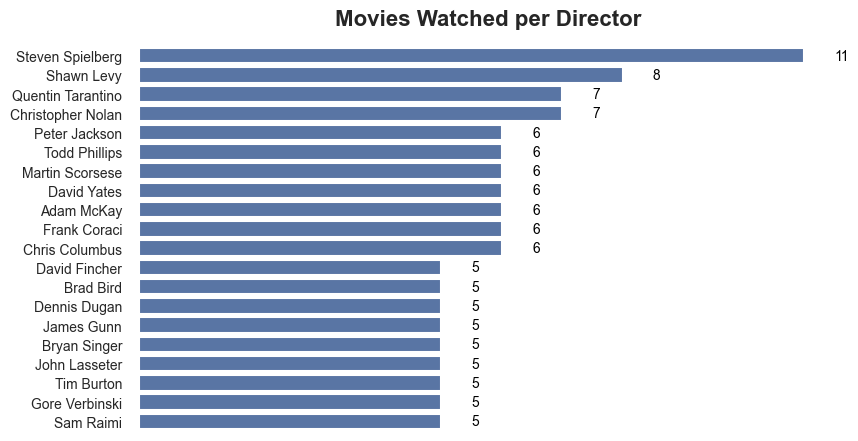

In [171]:
# bar chart of movies watched per director (Top 15)
director_counts = combined_movies["Director"].value_counts().head(20)

plt.figure(figsize=(9,5))
sns.set_theme(style="ticks", context="talk")

ax = sns.barplot(
    x=director_counts.values,
    y=director_counts.index,
)

plt.title("Movies Watched per Director", fontsize=16, fontweight="bold", pad=15)


for i, count in enumerate(director_counts.values):
    ax.text(count + 0.5, i, str(count), va="center", fontsize=10, color="black")

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.tick_params(left=False, bottom=False, labelleft=True, labelbottom=False)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)





C:\Users\slleh\AppData\Local\Temp\ipykernel_18436\915825690.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


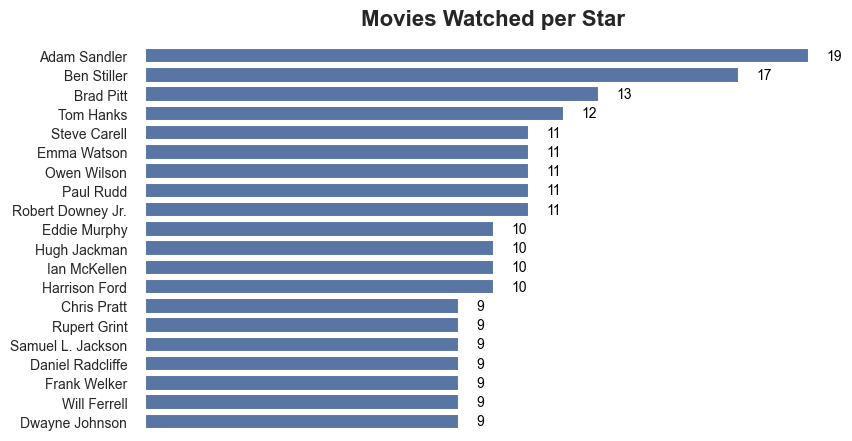

In [172]:
# Movies watched by actor (top 3 actors from each movie)
df_stars = combined_movies.assign(Stars=combined_movies["Stars"].str.split(", ")).explode("Stars")
star_counts = df_stars["Stars"].value_counts().head(20)

plt.figure(figsize=(9,5))
sns.set_theme(style="ticks", context="talk")

ax = sns.barplot(
    x=star_counts.values,
    y=star_counts.index,
)

plt.title("Movies Watched per Star", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Number of Movies")
plt.ylabel("Star")

for i, count in enumerate(star_counts.values):
    ax.text(count + 0.5, i, str(count), va="center", fontsize=10, color="black")

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.tick_params(left=False, bottom=False, labelleft=True, labelbottom=False)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

C:\Users\slleh\AppData\Local\Temp\ipykernel_18436\2737245733.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
C:\Users\slleh\AppData\Local\Temp\ipykernel_18436\2737245733.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


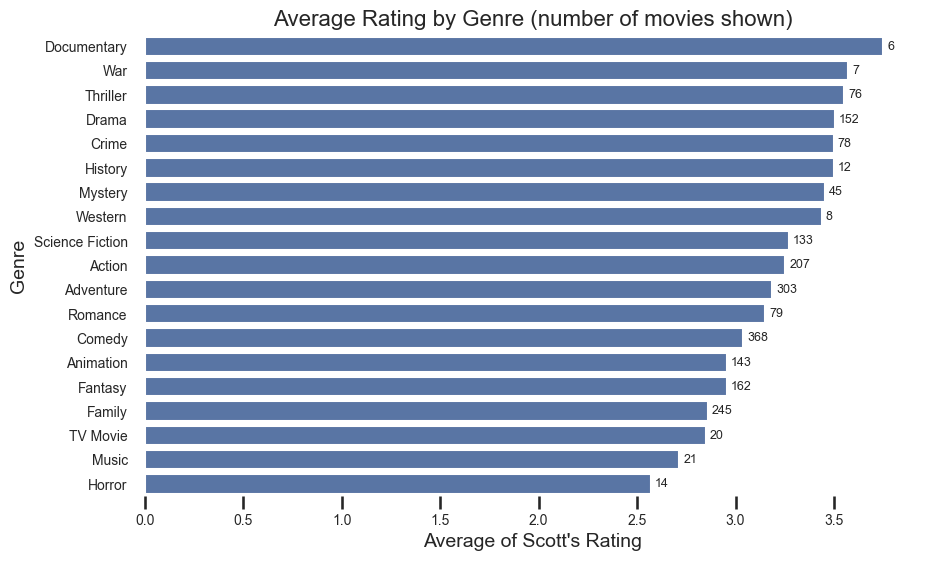

In [173]:
# Average rating based on Genre (with count per genre)
df_genres = combined_movies.assign(Genres=combined_movies["Genres"].str.split(", ")).explode("Genres")

genre_avg = df_genres.groupby("Genres")["Rating"].mean().sort_values(ascending=False)

genre_stats = (
    df_genres.groupby("Genres")["Rating"]
    .agg(["count", "mean"])
    .sort_values("mean", ascending=False)
)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="mean",
    y=genre_stats.index,
    data=genre_stats,
    
)

for i, (count, mean) in enumerate(zip(genre_stats["count"], genre_stats["mean"])):
    ax.text(mean + 0.02, i, f"{count}", va="center", fontsize=9)

for spine in ["top", "right", "left", 'bottom']:
    ax.spines[spine].set_visible(False)

ax.tick_params(left=False, bottom=True, labelleft=True, labelbottom=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

plt.title("Average Rating by Genre (number of movies shown)", fontsize=16)
plt.xlabel("Average of Scott's Rating", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.show()

C:\Users\slleh\AppData\Local\Temp\ipykernel_18436\1953832399.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
C:\Users\slleh\AppData\Local\Temp\ipykernel_18436\1953832399.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


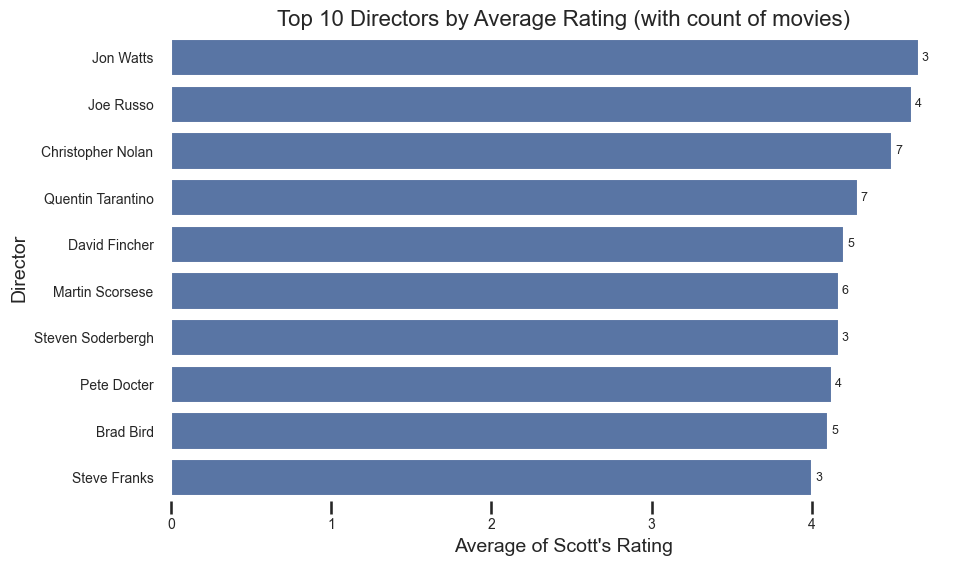

In [174]:
# Top directors y average rating (minimum 3 movies watched)
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="mean",
    y=director_stats.index[:10],
    data=director_stats.head(10),
)

# Add count labels
for i, (count, mean) in enumerate(zip(director_stats["count"].head(10), director_stats["mean"].head(10))):
    ax.text(mean + 0.02, i, str(count), va="center", fontsize=9)

# Remove all spines
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Tick styling
ax.tick_params(left=False, bottom=True, labelleft=True, labelbottom=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

# Titles and labels
plt.title("Top 10 Directors by Average Rating (with count of movies)", fontsize=16)
plt.xlabel("Average of Scott's Rating", fontsize=14)
plt.ylabel("Director", fontsize=14)

plt.tight_layout()
plt.show()


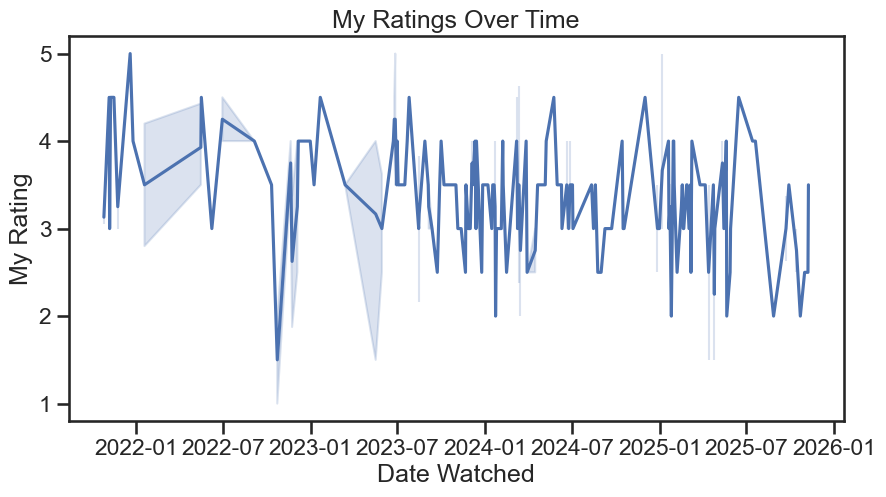

In [175]:

combined_movies["Date"] = pd.to_datetime(combined_movies["Date"])
df = combined_movies.sort_values("Date")

plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="Rating", data=df)
plt.title("My Ratings Over Time")
plt.xlabel("Date Watched")
plt.ylabel("My Rating")
plt.show()


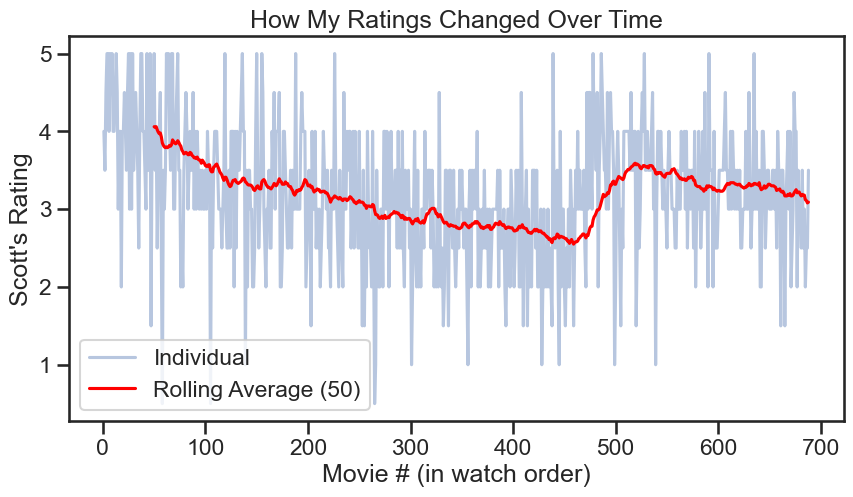

In [176]:
# Rolling average of rating (50 movies)

combined_movies["Watch_Order"] = range(1, len(combined_movies) + 1)
combined_movies["Rolling_Avg"] = combined_movies["Rating"].rolling(window=50).mean()

plt.figure(figsize=(10,5))
sns.lineplot(x="Watch_Order", y="Rating", data=combined_movies, alpha=0.4, label="Individual")
sns.lineplot(x="Watch_Order", y="Rolling_Avg", data=combined_movies, color="red", label="Rolling Average (50)")
plt.title("How My Ratings Changed Over Time")
plt.xlabel("Movie # (in watch order)")
plt.ylabel("Scott's Rating")
plt.legend()
plt.show()

# random peak (475-525) came from adding movies i had seen in past all at once. maybe i remembered them because I liked them

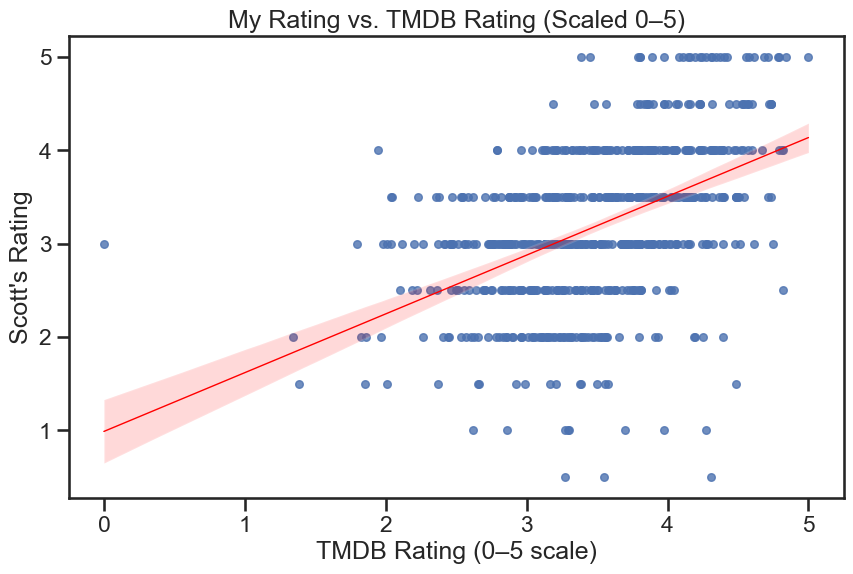

Correlation between Scott's ratings and TMDB Ratings: 0.47


In [177]:
# My Letterboxd ranking vs. TMDB rating (scaled)

from sklearn.preprocessing import MinMaxScaler

upper_cap = combined_movies["TMDB_Rating"].quantile(1)
combined_movies["Rating_Capped"] = combined_movies["TMDB_Rating"].clip(upper=upper_cap)

scaler = MinMaxScaler(feature_range=(0,5))
combined_movies["Rating_Scaled"] = scaler.fit_transform(combined_movies[["Rating_Capped"]])

plt.figure(figsize=(10,6))
sns.regplot(
    x="Rating_Scaled", 
    y="Rating", 
    data=combined_movies, 
    scatter_kws={"s":30},  
    line_kws={"color":"red", "linewidth":1}  
)
plt.title("My Rating vs. TMDB Rating (Scaled 0–5)")
plt.xlabel("TMDB Rating (0–5 scale)")
plt.ylabel("Scott's Rating")
plt.show()

correlation = combined_movies["Rating"].corr(combined_movies["Rating_Scaled"])
print(f"Correlation between Scott's ratings and TMDB Ratings: {correlation:.2f}")

Building a model to predict what I would rate a movie on Letterboxd

In [284]:
# creating a testing and training
from sklearn.model_selection import train_test_split


df = combined_movies.copy()
y = df['Rating'].values


train_idx, test_idx = train_test_split(df.index, test_size=0.2, random_state=25)

df_train = df.loc[train_idx].copy()
df_test = df.loc[test_idx].copy()


In [ ]:
# Calculating avg rating per director on training set
director_mean = df_train.groupby('Director')['Rating'].mean()

# Mapping to training set and test set (a director with no previous movies just gets overall average)
df_train['Director_encoded'] = df_train['Director'].map(director_mean)

overall_mean = df_train['Rating'].mean()
df_test['Director_encoded'] = df_test['Director'].map(director_mean).fillna(overall_mean)


In [ ]:
# Seperating actors (listed in one column in webscraped column)
df_train_exploded = df_train.assign(Stars=df_train['Stars'].str.split(", ")).explode('Stars')

# Avg rating per actor
actor_mean = df_train_exploded.groupby('Stars')['Rating'].mean()

def encode_actors(stars):
    if pd.isna(stars):
        return overall_mean 
    stars_list = str(stars).split(", ")
    encoded_values = [actor_mean.get(actor, overall_mean) for actor in stars_list]
    return np.mean(encoded_values)


df_train['Stars_encoded'] = df_train['Stars'].apply(encode_actors)
df_test['Stars_encoded'] = df_test['Stars'].apply(encode_actors)


In [ ]:
df_train['Genres'] = df_train['Genres'].fillna("Unknown")
df_test['Genres'] = df_test['Genres'].fillna("Unknown")

# Seperating genres (listed in one column in webscraped column)
df_train_exploded = df_train.assign(Genres=df_train['Genres'].str.split(", ")).explode('Genres')

# avg rating per genre in training set
genre_mean = df_train_exploded.groupby('Genres')['Rating'].mean()
overall_mean = df_train['Rating'].mean()

def encode_genres(genres_str):
    genres_list = genres_str.split(", ")
    encoded_values = [genre_mean.get(g, overall_mean) for g in genres_list]
    return np.mean(encoded_values)  

df_train['Genres_encoded'] = df_train['Genres'].apply(encode_genres)
df_test['Genres_encoded'] = df_test['Genres'].apply(encode_genres)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# numeric data columns
numeric_cols = ['Year', 'Runtime', 'Popularity', 'TMDB_Rating']
scaler = MinMaxScaler()
X_train_numeric = pd.DataFrame(scaler.fit_transform(df_train[numeric_cols]), columns=numeric_cols, index=df_train.index)
X_test_numeric = pd.DataFrame(scaler.transform(df_test[numeric_cols]), columns=numeric_cols, index=df_test.index)


In [ ]:
# Combine numeric + encoded director + encoded actors + encoded genres
X_train_final = pd.concat(
    [X_train_numeric, df_train[['Director_encoded', 'Stars_encoded', 'Genres_encoded']]],
    axis=1
)

X_test_final = pd.concat(
    [X_test_numeric, df_test[['Director_encoded', 'Stars_encoded', 'Genres_encoded']]],
    axis=1
)
y_train_final = df_train['Rating'].values
y_test_final = df_test['Rating'].values

print("Training feature shape:", X_train_final.shape)
print("Test feature shape:", X_test_final.shape)


Training feature shape: (550, 7)
Test feature shape: (138, 7)


Test RMSE: 0.86, MAE: 0.68


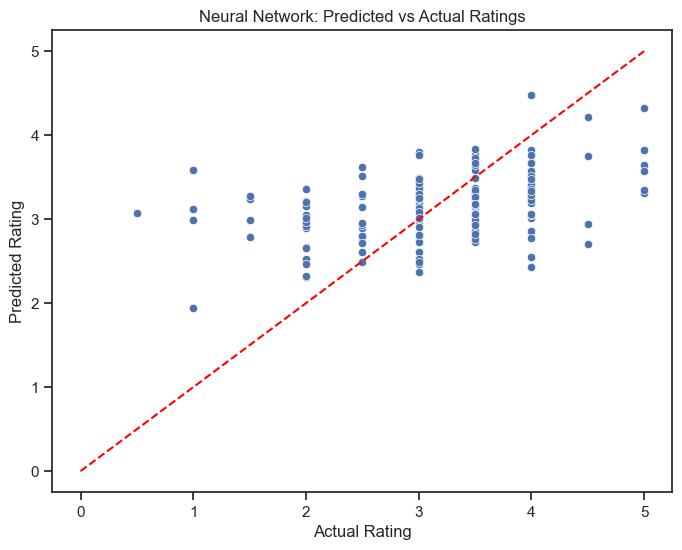

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_train_final = X_train_final.fillna(0)
X_test_final = X_test_final.fillna(0)
y_scaler = MinMaxScaler(feature_range=(0, 1))

# adapting to 2D array
y_train_scaled = y_scaler.fit_transform(y_train_final.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test_final.reshape(-1,1))



# Defining Neural Network
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # 2 hidden layers
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# Training the model
mlp.fit(X_train_final, y_train_scaled.ravel())


# applying test set
y_pred_scaled = mlp.predict(X_test_final).reshape(-1, 1)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# evaluating performance
rmse = np.sqrt(mean_squared_error(y_test_final, y_pred))
mae = mean_absolute_error(y_test_final, y_pred)

print(f"Test RMSE: {rmse:.2f}, MAE: {mae:.2f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_final, y=y_pred.ravel())  # <-- flatten y_pred
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Neural Network: Predicted vs Actual Ratings")
plt.plot([0,5], [0,5], color='red', linestyle='--')  # diagonal line
plt.show()


In [293]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

#Using K-fold method
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# 5 folds, 10 repeats (50 total)
rkf = RepeatedKFold(
    n_splits=5,     
    n_repeats=10,   
    random_state=42
)

scores = cross_val_score(
    mlp,
    X_train_final,
    y_train_final,
    scoring=mae_scorer,
    cv=rkf,
    n_jobs=-1
)

print("Mean MAE:", -scores.mean())
print("Std of MAE:", scores.std())


Mean MAE: 0.24529341457635576
Std of MAE: 0.018156999283981526


In [294]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor

# Using bootstrapping

X_train_b = X_train_final.reset_index(drop=True)
y_train_b = pd.Series(y_train_final).reset_index(drop=True)

N_BOOTSTRAPS = 50
mae_results = []
rmse_results = []

for i in range(N_BOOTSTRAPS):
    sample_idx = np.random.choice(len(X_train_b), size=len(X_train_b), replace=True)
    oob_idx = np.setdiff1d(np.arange(len(X_train_b)), sample_idx)

    X_boot = X_train_b.iloc[sample_idx]
    y_boot = y_train_b.iloc[sample_idx]

    X_oob = X_train_b.iloc[oob_idx]
    y_oob = y_train_b.iloc[oob_idx]

    mlp = MLPRegressor(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='adam',
        max_iter=3000,
        random_state=i
    )
    mlp.fit(X_boot, y_boot)

    if len(oob_idx) > 0:
        pred = mlp.predict(X_oob)

        mae = mean_absolute_error(y_oob, pred)
        rmse = np.sqrt(mean_squared_error(y_oob, pred))

        mae_results.append(mae)
        rmse_results.append(rmse)

print("Bootstrap Mean MAE :", np.mean(mae_results))
print("Bootstrap Std MAE  :", np.std(mae_results))
print("Bootstrap Mean RMSE:", np.mean(rmse_results))
print("Bootstrap Std RMSE :", np.std(rmse_results))


Bootstrap Mean MAE : 0.24623628865542205
Bootstrap Std MAE  : 0.016697961869843795
Bootstrap Mean RMSE: 0.33369091770972953
Bootstrap Std RMSE : 0.045460613477263885


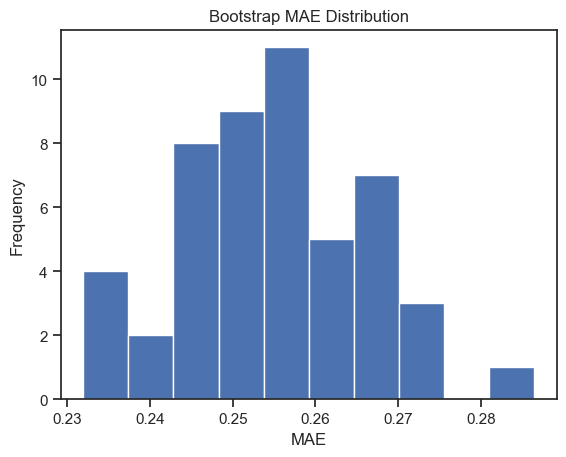

In [266]:
import matplotlib.pyplot as plt

plt.hist(mae_results, bins=10)
plt.xlabel("MAE")
plt.ylabel("Frequency")
plt.title("Bootstrap MAE Distribution")
plt.show()


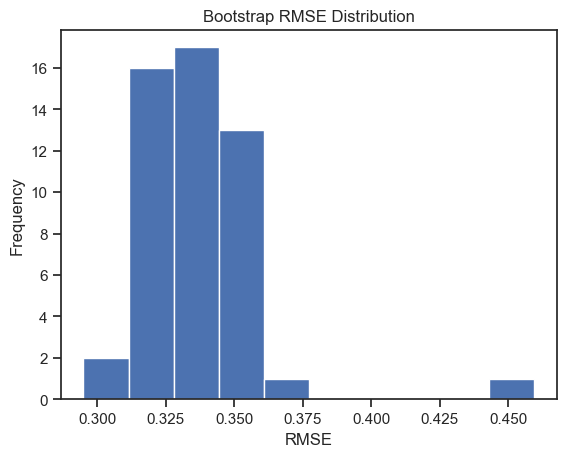

In [267]:
plt.hist(rmse_results, bins=10)
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.title("Bootstrap RMSE Distribution")
plt.show()


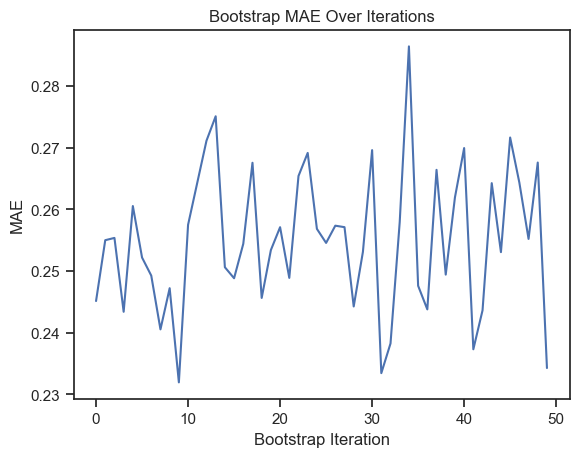

In [269]:
plt.plot(mae_results)
plt.xlabel("Bootstrap Iteration")
plt.ylabel("MAE")
plt.title("Bootstrap MAE Over Iterations")
plt.show()

In [ ]:
import tmdbsimple as tmdb
import pandas as pd
import time

# pulling top 500 rated movies on TMDB

tmdb.API_KEY =

top_ids = []

for p in range(1, 26):  
    response = tmdb.Movies().top_rated(page=p)
    for m in response["results"]:
        top_ids.append(m["id"])
    time.sleep(0.2)


def get_movie_details_by_id(movie_id):
    try:
        detail_url = f"https://api.themoviedb.org/3/movie/{movie_id}"
        detail_params = {"api_key": API_KEY, "append_to_response": "credits"}
        detail_response = requests.get(detail_url, params=detail_params)
        detail_data = detail_response.json()

        director = next(
            (p["name"] for p in detail_data["credits"]["crew"] if p["job"] == "Director"),
            None
        )

        genres = ", ".join([g["name"] for g in detail_data.get("genres", [])])
        cast_list = [c["name"] for c in detail_data["credits"].get("cast", [])[:3]]
        stars = ", ".join(cast_list)

        return {
            "TMDB_ID": movie_id,
            "Title": detail_data.get("title"),
            "Year": detail_data.get("release_date")[:4] if detail_data.get("release_date") else None,
            "Runtime": detail_data.get("runtime"),
            "Genres": genres,
            "Director": director,
            "Stars": stars,
            "TMDB_Rating": detail_data.get("vote_average"),
            "Revenue": detail_data.get("revenue"),
            "Popularity": detail_data.get("popularity")
        }
    except:
        return None


full_top500 = []

for movie_id in top_ids:
    data = get_movie_details_by_id(movie_id)
    if data:
        full_top500.append(data)
    time.sleep(0.2)

unseen = pd.DataFrame(full_top500)


In [296]:
def transform_unseen(df):
    df2 = df.copy()

    
    df2["Director_encoded"] = df2["Director"].map(director_mean).fillna(overall_mean)


    def encode_actors_list(stars):
        if pd.isna(stars): return overall_mean
        values = [actor_mean.get(a, overall_mean) for a in str(stars).split(", ")]
        return np.mean(values)

    df2["Stars_encoded"] = df2["Stars"].apply(encode_actors_list)

    
    def encode_genres_list(genres):
        if pd.isna(genres): return overall_mean
        values = [genre_mean.get(g, overall_mean) for g in str(genres).split(", ")]
        return np.mean(values)

    df2["Genres_encoded"] = df2["Genres"].apply(encode_genres_list)

   
    numeric_cols = ["Year", "Runtime", "Popularity", "TMDB_Rating"]
    df2[numeric_cols] = df2[numeric_cols].apply(pd.to_numeric, errors="coerce")
    df2[numeric_cols] = scaler.transform(df2[numeric_cols].fillna(0))

    
    X = df2[
        ["Year", "Runtime", "Popularity", "TMDB_Rating",
         "Director_encoded", "Stars_encoded", "Genres_encoded"]
    ].fillna(0)

    return X


# Applying model to unseen movies


X_unseen = transform_unseen(unseen)
unseen["predicted_rating"] = np.clip(mlp.predict(X_unseen), 0, 5)

In [297]:
already_seen_ids = (
    combined_movies["TMDB_ID"]
    .dropna()                
    .astype(int)            
    .unique()               
)
already_seen_ids = set(already_seen_ids)

recommended = unseen[~unseen["TMDB_ID"].astype(int).isin(already_seen_ids)]

# Sort by predicted rating (descending)
recommended = recommended.sort_values("predicted_rating", ascending=False)

top10 = recommended.head(15)

print("\nTop 15 Movie Reccomendations for Scott\n")
print(top10[["Title", "Year", "predicted_rating"]])


Top 15 Movie Reccomendations for Scott

                                  Title  Year  predicted_rating
479                        Frankenstein  2025          4.921646
391                         Raging Bull  1980          4.102898
99                            Gladiator  2000          4.094578
276  Kill Bill: The Whole Bloody Affair  2011          4.047357
114                        The Prestige  2006          4.040356
295                              Casino  1995          4.009711
259                    Transformers One  2024          3.959819
53                       The Wild Robot  2024          3.954414
495                          Just Mercy  2019          3.919182
231                  Memories of Murder  2003          3.883544
361                        Blade Runner  1982          3.878395
137                               Alien  1979          3.870963
471                   Kill Bill: Vol. 2  2004          3.853213
261                           The Sting  1973          3.784639